<a href="https://colab.research.google.com/github/Schemm1/Temporal_Fusion_Transform/blob/master/l02c01_celsius_to_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einführung in die Keras API

Anhand des folgenden einfachen Beispiels soll die Vorgehensweise eines neuronalen Netzes verdeutlicht werden.

Hierzu werden Datenpunkte auf dem Intervall [-20,+40] erzeugt (Temperatur[Grad Celsius]) c und in Grad Fahrenheit f anhand folgender Formel umgerechnet:    

$$ f = c \times 1.8 + 32 $$


## Laden der Pakete 

In [2]:
# Tensorflow
# interaktive Ploterstellung
#%matplotlib ipympl
import tensorflow as tf

# Laden des Moduls Model und Sequentials
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

# Laden des Moduls Dense (zur Erstellung vollvermaschte Layer)
from tensorflow.keras.layers import Dense, Input

# Import weiterer sonstiger Pakete
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt

# Standardeinstellungen für die Ausgabe
np.set_printoptions(precision=3)
pd.set_option('display.precision',2)

## Erstellung der Daten

In [3]:
# Erstellung eines zufälligen Temperatur-Samples in Grad Celsius
celsius    = np.random.uniform(low=-20, high=40, size=100)

# Umrechnung in Grad Fahrenheit
fahrenheit = celsius*1.8+32

# Transfer in einen DataFrame
temperature =pd.DataFrame({'celsius':celsius,'fahrenheit':fahrenheit})

# Darstellung der Daten (transponiert)
temperature[0:10].T

,0,1,2,3,4,5,6,7,8,9
celsius,-9.38,21.35,0.06,1.54,12.44,3.22,-16.73,30.40,-3.09,-8.92
fahrenheit,15.11,70.43,32.11,34.78,54.39,37.79,1.89,86.73,26.43,15.94


## Unterteilen in Trainings, Validierungs, und Testdaten

In [4]:
from sklearn.model_selection import train_test_split

# Trainingsdaten werden in Training, Validierung und Testdaten unterteilt
x_train, x_test, y_train, y_test = train_test_split(celsius, fahrenheit, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4)

## Aufbau eines Modells vom Typ Sequential

Tensorflow bietet mit der Keras -Schnittstelle unterschiedliche APIs an, um ein neuronales Netz zu konfigurieren.

Wir werden zuerst mit dem Modul `Sequential` arbeiten (Sequential groups a linear stack of layers into a tf.keras.Model).<br>

Ein Modelltyp`Sequential` eignet sich für ein vollvermachtes Neuronales Netz aus mehreren Schichten (Layer),  bei dem jede Schicht genau **einen** Eingabetensor (input Layer) und **einen** Ausgabetensor (Outputlayer mit i.d.R. 1 Neuron) hat, oder kurz:<br>
<img src="KNN.png" alt="KNN" width="800" >




**typische Abfolge**

- **Schritt1**: Initialisierung eines KNN-Objektes (Klasse: Sequential)

- **Schritt2**: Erstellung der Netzarchitektur (Methoden: add,summary, Layer-Klasse Dense)

- **Schritt3**: Compilieren des Objektes (Methode: compile)

- **Schritt4**: Trainieren des Netzes (Methode: fit)

- **Schritt5**: Überprüfen und Auswerten des Netzes (Methoden: evaluate, predict)


### **Schritt 1**: Initialisierung eines KNN-Objektes

Der Aufruf der Klasse Sequential kann alternativ auch mit Übergabeparametern erfolgen (siehe unten). Dies führt dazu, dass Schritt 1 und 2 zusammengefasst werden.

In [5]:
KNN = Sequential()

Das Objekt KNN kann als Hülle aufgefasst werden in die nun in Schritt 2 mit der Methode`add()` die jeweiligen "Layer" = Schicht iterativ hinzugefügt werden können. <br>Mit der Methode `summary` kann die bis dato zusammengestellte Architektur überprüft werden (Hinweis: diese iterative Überprüfung funktioniert so nur in der API Sequential).

### **Schritt 2**: Hinzufügen von Layer mit Methode add

In Keras stehen eine Vielzahl von verschiedenen Layern für unterschiedliche Netztypen zur Verfügung. 
Im Folgenden werden wir uns auf den Layer Typ Dense konzentrieren, der eine vollvermaschte Schicht von Neuronen darstellt. Bis auf die erste Schicht, muss nicht die Anzahl der Inputs spezifiziert werden, da dies intern bestimmt wird!
```python
tf.keras.layers.Dense(
    units,
    activation=None,
    input_shape=None,
    name =None
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

Wir beschränken uns hierbei die Argumente `units` und `input_shape` zu übergeben.
*   `input_shape=[1]` —  gibt an, dass die Eingabe für diese Schicht ein einzelner Wert ist. Das heißt, die Form ist ein eindimensionales Array mit einem Element. Da dies die erste (und einzige) Ebene ist, ist diese Eingabeform die Eingabeform des gesamten Modells. Der Einzelwert ist eine Fließkommazahl, die Grad Celsius darstellt.

*   `units=1` — Hier wird die Anzahl der Neuronen in der Schicht angegeben. Die Anzahl der Neuronen legt fest, wie viele interne Variablen die Schicht zu lernen versucht, um das Problem zu lösen (mehr dazu später). Da es sich um die letzte Schicht handelt, ist dies auch die Größe der Ausgabe des Modells - ein einzelner Fließkommawert, der Grad Fahrenheit darstellt. (In einem mehrschichtigen Netz müssten Größe und Form der Schicht mit der `input_shape` der nächsten Schicht übereinstimmen).


In [6]:
KNN.add(Dense(units=1, input_shape=[1],name="Lay1"))
# Mit Methode summary kann die ERstellung des Netzes überprüft werden
KNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lay1 (Dense)                (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Zugang zu den Layern
KNN.layers
# falls notwendig können Layer auch wieder entfernt werden
#KNN.pop()

alternative Schreibweise mit direkter Spezifikation der Layer bei Initialisierung des Objektes:
```python
KNN = Sequential([
  Dense(units=1, input_shape=[1])
])
```

### **Schritt 3**: Kompilieren des Modells und Parametrierung der Optimierungsfunktion

Mit der Methode `compile` kann das Netz gekapselt werden und der Auftruf der Optimierungsfunktion spezifiziert werden

``` python
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
```

Wichtige Parameter in diesem Aufruf sind:<br>

- **loss** — die Form der Verlustfunktion (Aweichung zwischen prognostiziertem und beobachteten Label (Output)

- **optimizer** — Wahl der Optimierungsfunktion (wird in nächster Sitzung besprochen)


In [8]:
KNN.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

### **Schritt 4**: Trainieren des Modells

Während des Trainings nimmt das Modell das Feature Temperatur in Celsius als Input auf, berechnet mit den `Gewichten` die `Nettoeingabe` und führt auf der Nettoeingabe die `Aktivierung` des Neurons durch. In diesem Fall ist die Aktivierung linear (Nettoeingabe = Aktivierung). Das Ergebnis ist die Übergabe an die nächste Schicht oder der wie in diesem Fall direkt der prognostizierte Featurewert (bei Modellen mit mehreren Schichten wird dieser in der letzten Schicht ausgegeben). Auf Basis des prognostizierten Featurewertes wird die Verlustfunktion gegenüber dem tatsächlichen Featurewert bestimmt und über alle `Samples` des `Batches` summiert. Durch Anpassung (Trainieren) der Gewichte mit Hilfe des `Gradientenabstiegsverfahrens` und dem `Backpropagation` zur Bestimmung der Ableitungen wird über die vorgegebene Anzahl von `Zyklen` = Epochs * Samplesize(Trainingsdaten)/Batchgröße die Anpassung der Gewichte vorgenommen. 

Mit der Methode `fit` wird das Modell trainiert. <br>
```python
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```

Wichtige Parameter in diesem Aufruf sind:<br>

- **x,y** — Features und Labels des Trainingdatensatzes

- **validation_data** — Features und Labels des Validierungsdatensatzes (zur Festlegung der Hyperparameter)

- **batch_size** - Anzahl der Samples zur Berechnung der Verlustfunktion

- **epochs** - Anzahl der Iterationen des kompletten (Training)-Datenbestandes  

- **callbacks** - Anweisungen, welche an einem bestimmten Punkt des funktionsaufrufs durchgeführt werden soll (z.B. Speicherung des Modells mit dem besten Validierungs-Loss oder Abbruchkriterium für das Trainieren, falls keine Verbesserungen mehr erzeilt werden können) 

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Abbrufkriterium, falls sich über eine definierte Anzahl von Anpassungen der Validierungs-Loss nicht verbessert
early = EarlyStopping(monitor='val_loss', patience=50)

# Anweisung zur Speicherung des besten Modells
check = ModelCheckpoint(filepath='modelTempUmrechnung.h5', 
                        monitor='val_loss', save_best_only=True)
epochen =400

history = KNN.fit(x_train, y_train, epochs=epochen,verbose = None, validation_data = (x_val,y_val), callbacks = [early,check])
print("Finished training the model")

Finished training the model


### **Schritt 5**: Überprüfen und Auswerten des Netzes

**Betrachtung der Entwicklung der Verlustfunktion der Datensätze im Training** 

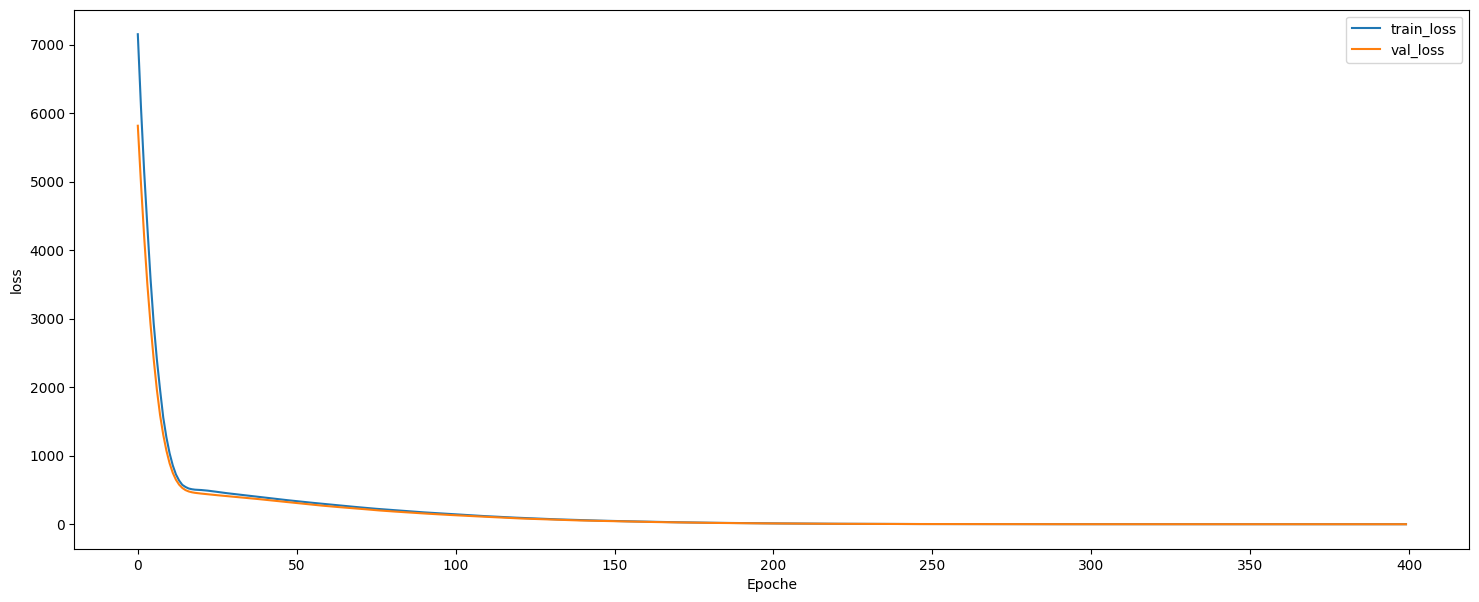

In [10]:
# Betrachtung 
fig, ax =plt.subplots(nrows=1,ncols=1,**{'figsize': (18, 7)})
lin1 = ax.plot(history.history['loss'],label='train_loss')
lin2 = ax.plot(history.history['val_loss'],label='val_loss')

ax.set(xlabel='Epoche',ylabel='loss')
ax.legend();

**Erstellung von Prognosen des Testdatensatzes**

In [11]:
print(KNN.predict([100.0]))

1/1 [==============================] - 0s 121ms/step
[[212.147]]


Korrekter Wert $100 \times 1.8 + 32 = 212$, 

**Betrachtung der trainierten Gewichte**

In [12]:
print("Gewichte: {}".format(KNN.get_layer(index=0).get_weights()))

Gewichte: [array([[1.802]], dtype=float32), array([31.912], dtype=float32)]


Das neuronale Netz fungiert wie eine klassische lineare Regression $y = mx + b$,um die Umrechnungsformel zu replizieren $f = 1.8c + 32$.

## Aufgabe

 1. Verändern Sie die Lernrate des Optimierers. Was fällt auf hinsichtlich Laufzeit und Konvergenzverhalten?
 2. Erstellen Sie ein Netz mit mehr Neuronen und Layern vom Typ Dense
 3. Betrachten Sie den Trainingserfolg
 4. Versuchen Sie die resultierenden Gewichte zu interpretieren
 5. Fügen Sie bei Erstellung der !!Trainingswerte für das Label (y)!! ein Rauschen ein:
    - y_train = ytrain + np.random.normal(loc = 0.0, scale = 1.0, size = None)
    - Betrachten Sie nun den Erfolg (Validierungsloss) des einfachen Netzes und des komplexeren Netzes am Ende der betrachten Epochen im entsprechenden Plot oben

Erweiterung 
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))